## Google Stock price prediction using timeseries data
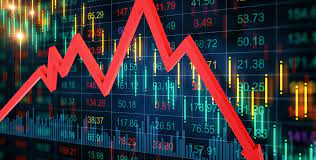

In [176]:
# Import all the libraries

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# Read dataset
train_data = pd.read_csv('D:/ML_learning/trainset_google_stock.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


### Exploretry Data Analysis (EDA)

In [178]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [179]:
train_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [180]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [181]:
train = train_data.loc[:, ["Open"]].values
train

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [182]:
# Feature Scaling: as LSTM are sensitive to high values. We performed using MinMax scalar

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) # Converts between 0 and 1
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

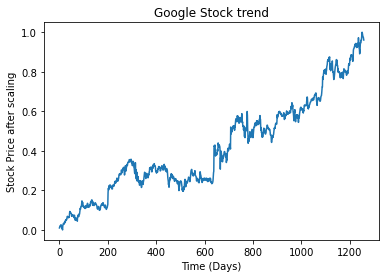

In [183]:
# plotting the trend of df1
plt.plot(train_scaled)
plt.ylabel("Stock Price after scaling")
plt.xlabel("Time (Days)")
plt.title("Google Stock trend")
plt.show()

In [184]:
# Creating a data structure with 50 timesteps and 1 output
## Preparing the data so that we can fit the LSTM model
# converting an array of values in dataset metrix
X_train = []
y_train = []
timesteps = 1
for i in range(timesteps, 1258): #1258: len of days
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [185]:
# reshape data into X=t,t+1,t+2,t+3 and Y=t+4 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.01011148]],

       [[0.01388614]],

       [[0.01690727]],

       ...,

       [[0.9805695 ]],

       [[0.97637719]],

       [[0.97543954]]])

In [186]:
y_train

array([0.01388614, 0.01690727, 0.02109298, ..., 0.97637719, 0.97543954,
       0.9674549 ])

In [187]:
print(f"Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}")

Shape of X_train: (1257, 1, 1)
Shape of y_train: (1257,)


### LSTM model creation

In [188]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [189]:
# create and fit the LSTM network

# Initializing the model
model = Sequential()

# Firs LSTM layer and Regularization with Dropout
model.add(LSTM(128, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [190]:
# Compile
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train.reshape(-1,1), epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1342
Epoch 2/100
40/40 [==============================] - 0s 972us/step - loss: 0.0310
Epoch 3/100
40/40 [==============================] - 0s 972us/step - loss: 0.0196
Epoch 4/100
40/40 [==============================] - 0s 947us/step - loss: 0.0138
Epoch 5/100
40/40 [==============================] - 0s 923us/step - loss: 0.0087
Epoch 6/100
40/40 [==============================] - 0s 947us/step - loss: 0.0046
Epoch 7/100
40/40 [==============================] - 0s 947us/step - loss: 0.0023
Epoch 8/100
40/40 [==============================] - 0s 923us/step - loss: 0.0013
Epoch 9/100
40/40 [==============================] - 0s 923us/step - loss: 9.2013e-04
Epoch 10/100
40/40 [==============================] - 0s 947us/step - loss: 9.6240e-04
Epoch 11/100
40/40 [==============================] - 0s 923us/step - loss: 8.2576e-04
Epoch 12/100
40/40 [==============================] - 0s 947us/step - loss: 8.7669e-04

### Prediction on test dataset

In [158]:
test_data = pd.read_csv('D:/ML_learning/google_stock.csv')
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [159]:
test_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02
mean,1091.623677,1103.253992,1080.415168,1092.058077,1092.058077,1.776521e+06
std,47.793429,45.220728,49.907919,48.044551,48.044551,7.207634e+05
min,993.409973,1020.989990,980.640015,1001.520020,1001.520020,7.568000e+05
25%,1052.000000,1066.939941,1045.910034,1053.910034,1053.910034,1.293900e+06
50%,1090.569946,1104.250000,1085.150024,1094.800049,1094.800049,1.563200e+06
75%,1131.069946,1137.859985,1117.832031,1129.790039,1129.790039,2.057700e+06
max,1177.329956,1186.890015,1171.979980,1175.839966,1175.839966,4.857900e+06


In [191]:
real_stock_price = test_data.loc[:, ["Open"]].values
real_stock_price

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [192]:
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs

array([[0.96072522],
       [0.96295924],
       [0.9849825 ],
       [1.01765167],
       [1.02592586],
       [1.03727526],
       [1.04716297],
       [1.03020082],
       [1.04288801],
       [1.03752356],
       [1.07903237],
       [1.0703582 ],
       [1.07751546],
       [1.07809455],
       [1.08589991],
       [1.11673503],
       [1.14084047],
       [1.13422122],
       [1.13773765],
       [1.13966833],
       [1.12773968],
       [1.13151821],
       [1.12054117],
       [1.06453873],
       [1.02123712],
       [0.93377906],
       [1.00874318],
       [0.97270908],
       [0.9200852 ],
       [0.96249042],
       [0.95835332],
       [0.96380043],
       [1.00533684],
       [1.01821712],
       [1.0211957 ],
       [1.04312234],
       [1.05652648],
       [1.05163102],
       [1.07253718],
       [1.09107128],
       [1.06595918],
       [1.04505301],
       [0.96949583],
       [0.99991735],
       [1.03312436],
       [1.01929263],
       [1.05532673],
       [1.083

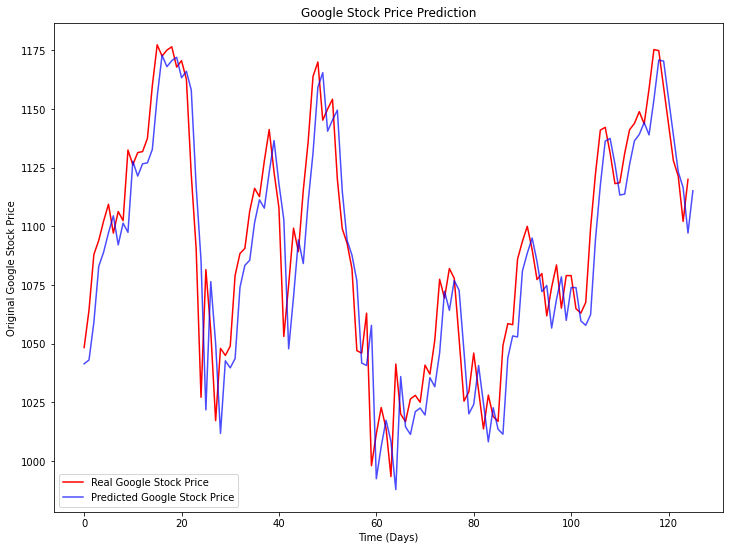

In [193]:
X_test = []
for i in range(timesteps, 127):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.figure(figsize=(12,9))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',alpha=0.7, label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Original Google Stock Price')
plt.legend()
plt.show()